In [1]:
# import data science libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



## Loading and Exploring the Data

In [2]:
# read the data
users_data = pd.read_pickle("../data/users_data_cleaned.pkl")


In [3]:
# preview the data

users_data.head(n = 3)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,0,1,0,1,0,0,0,0,1,0


In [4]:
# check the shape of the data

users_data.shape

(45209, 37)

In [5]:
print("# of rows:", users_data.shape[0])
print("# of columns:", users_data.shape[1])


# of rows: 45209
# of columns: 37


In [6]:
# check the structure of the data

users_data.info()

# do we have any non numerical data i.e. data types object or datetime?
# yay, we can continue?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   default              45209 non-null  bool   
 4   housing              45209 non-null  bool   
 5   loan                 45209 non-null  bool   
 6   duration             45209 non-null  int64  
 7   campaign             45209 non-null  int64  
 8   pdays                45209 non-null  int64  
 9   previous             45209 non-null  int64  
 10  term_deposit         45209 non-null  bool   
 11  job_Unknown          45209 non-null  uint8  
 12  job_admin.           45209 non-null  uint8  
 13  job_blue-collar      45209 non-null  uint8  
 14  job_entrepreneur     45209 non-null  uint8  
 15  job_housemaid        45209 non-null 

## Prepare data for ML 

### Define the target and explore the target

In [7]:
# Let's assume we want to build a model to predict the total amount a new user will spend, let total_amount_usd be the target
# Question - would we use a regression or classification algorithm?

# step 1. define our X and y

target = users_data.total_amount_usd
features = users_data.drop(['total_amount_usd'], axis = 1)

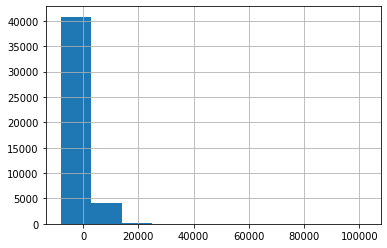

In [8]:
target.hist();

# we can see that the target is positively skewed, we may want to consider transforming it

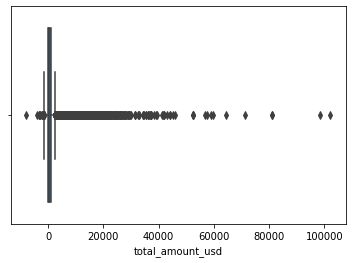

In [9]:
sns.boxplot(x = target);

# we can also see there all lots of outliers - we may want to consider removing them from the data before continuing
# for now, we will leave, as is.

In [10]:
users_data.total_amount_usd.describe()

count     45209.000000
mean       1066.539826
std        2762.588385
min       -8019.000000
25%           0.000000
50%         211.000000
75%        1022.000000
max      102127.000000
Name: total_amount_usd, dtype: float64

### Feature Scaling

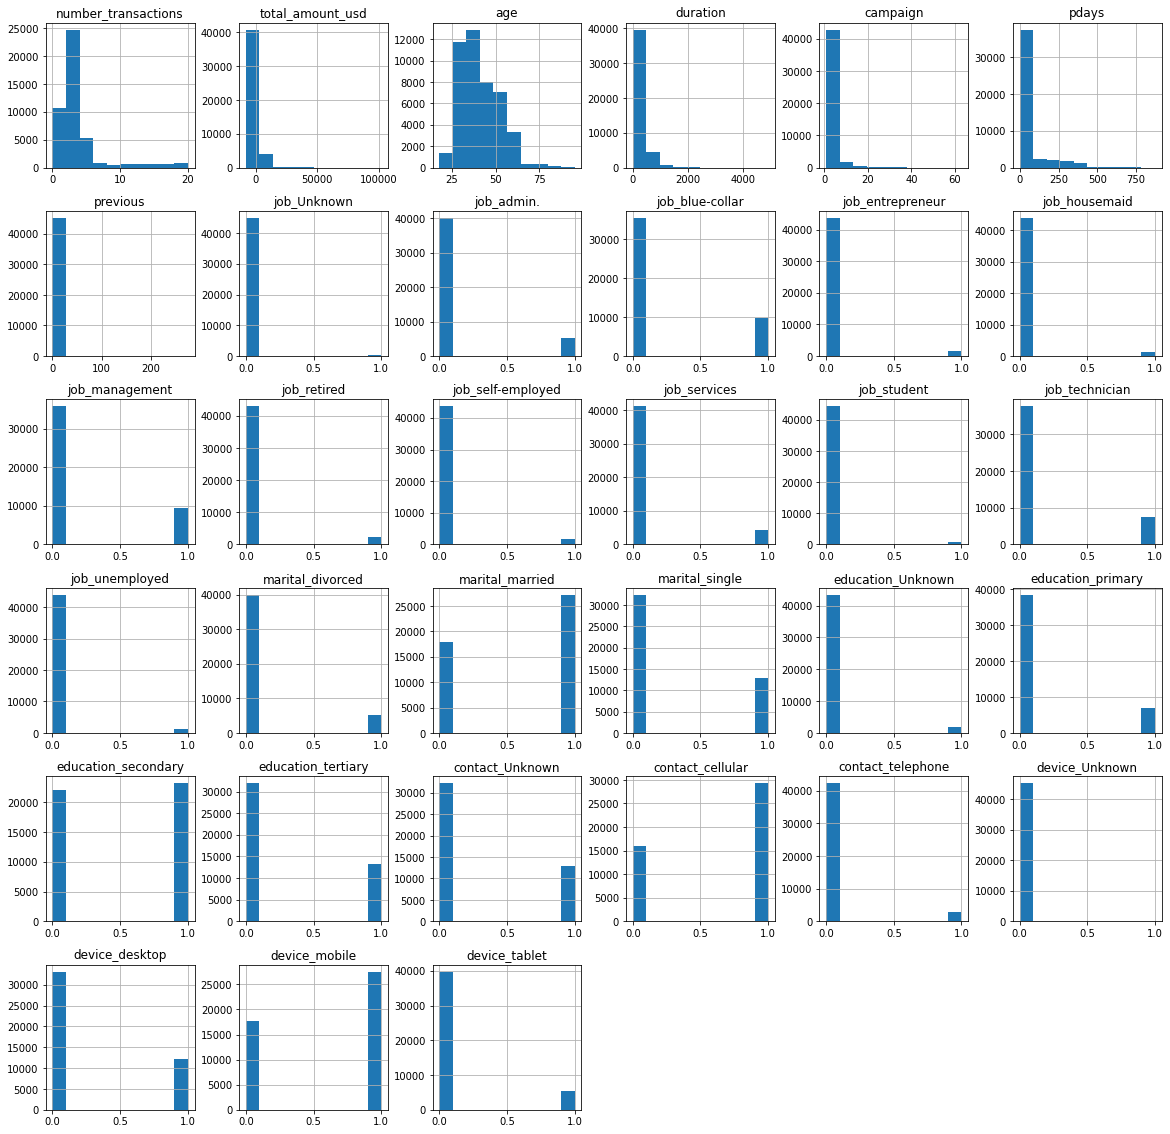

In [11]:
# Since we are using linear regression, this step is compulsory

# do you remember the distribution of the features?

users_data.hist(figsize=(20, 20));

In [12]:
# since most of our features are heavily skewed we will use normalisation to scale the data
# import MinMaxScaler from scikitlearn

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

features_scaled


array([[0.15      , 0.51948052, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33766234, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1       , 0.19480519, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.1       , 0.7012987 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.50649351, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15      , 0.24675325, 0.        , ..., 0.        , 1.        ,
        0.        ]])

### Split the data into train and test data sets

In [13]:
from sklearn.model_selection import train_test_split

# split into test and training data
# start by passing the target, without transformation

X_train, X_test, y_train, y_test = train_test_split(
                                                features_scaled, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 0)

In [14]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(31646, 36)
(31646,)


In [15]:
# print the shape of the test data 

print("\nTest Data")
print(X_test.shape)
print(y_test.shape)


Test Data
(13563, 36)
(13563,)


### Import the Linear Regression Model and Fit to the Training Data

In [25]:
# Import the Linear Regression model from sklearn

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)

In [28]:
# Fit the model on the training data

lr.fit(X_train, y_train) 

# This is your machine learning model!

LinearRegression(fit_intercept=False)

### Make predictions on the test data

In [18]:
# Make predictions on unseen data

y_pred = lr.predict(X_test) 

In [19]:
print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [1554.  1304.  1360.   930.  1106.5]
first five actual total amounts: [536.0, 31.0, 19.0, 115.0, 0.0]


### Evaluate the predictions

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 6: Evaluate the model performance

r2_score(y_test, y_pred)

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

# Pretty close to 0. Any ideas how to improve the score?


0.028044226200722555

In [21]:
mean_absolute_error(y_test, y_pred)

1321.7649856226499

In [22]:
mean_squared_error(y_test, y_pred)

7410708.70627811

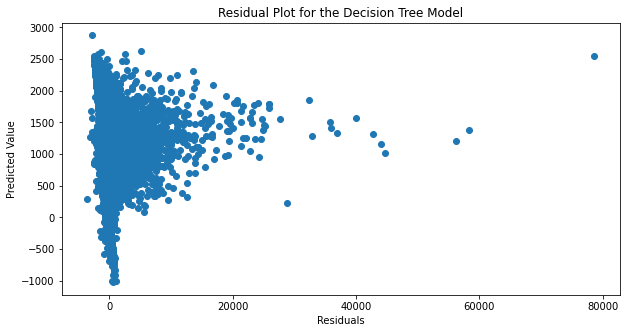

In [23]:
# residual plot - shows where all the error lies

plt.rcParams["figure.figsize"] = (10,5)

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot for the Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

# we want them the points to be centred around 0